In [1]:
%matplotlib inline

import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

C:\Users\abc\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
mnist = input_data.read_data_sets('MNIST_data',one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

0.2330158


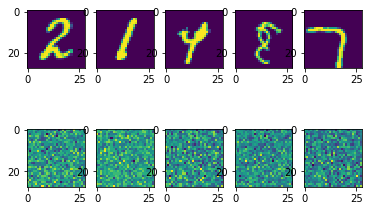

0.22051382


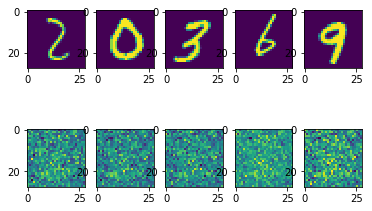

0.13130826


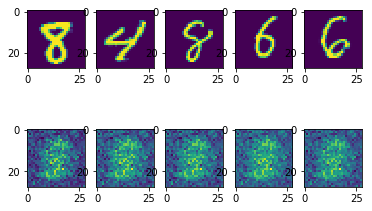

0.08033732


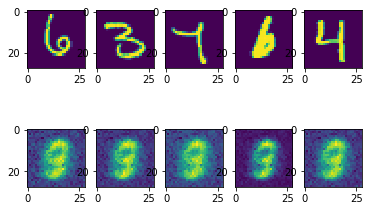

0.07239434


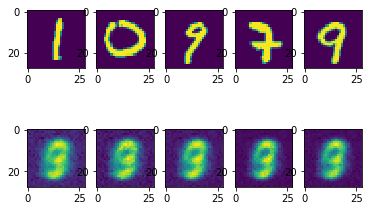

0.07532496


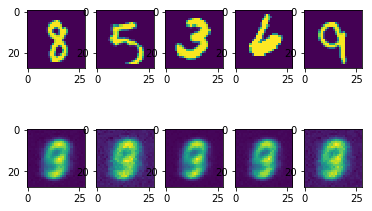

0.06905579


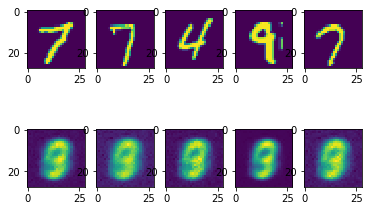

0.071910344


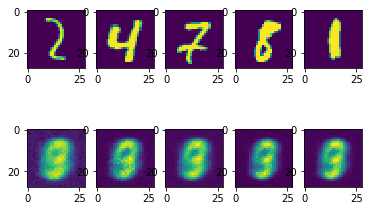

0.07263866


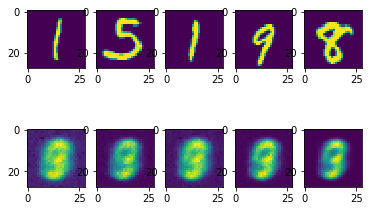

0.07233203


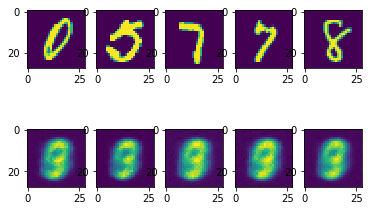

In [5]:
with tf.Graph().as_default() as g:
    inp_out = tf.placeholder(shape=[None,784],dtype = tf.float32)
    h = tf.keras.layers.Dense(
        32,activation=tf.nn.relu)(inp_out)
    out = tf.keras.layers.Dense(
        784,activation = tf.nn.sigmoid)(h)
    
    loss = tf.reduce_mean(tf.keras.losses.mean_squared_error(inp_out,out))

with tf.Session(graph=g) as sess:
    optim = tf.train.GradientDescentOptimizer(
        learning_rate=0.01)
    train_op = optim.minimize(loss)
        
    sess.run(tf.global_variables_initializer())
    
    for i in range(50000):
        batch_img,_ = mnist.train.next_batch(32)
        res_loss,_ = sess.run(
            [loss,train_op],
            feed_dict={inp_out:batch_img})
        
        if i % 5000 == 0 :
            print(res_loss)
            batch_img,_ = mnist.test.next_batch(5)
            res_out = sess.run(
                out,feed_dict={inp_out:batch_img})
            for j in range(10):
                plt.subplot(2,5,j + 1)
                
                img = batch_img[j] if j < 5 else res_out[j - 5]
                img = (img * 255).astype(np.uint8).reshape([28,28])
                plt.imshow(img)
            plt.show()
            